In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import folium

In [3]:
df = pd.read_excel("..\Data/DatosMadrid.xlsx")

df.head()

,Municipio,Distrito,Barrios,Población,0-15 años,16-64 años,65 o más años,Edad promedio,Densidad,Superficie,...,Seguridad Percibida de Noche,Delitos intervencion policial,Delitos contra seguridad vial,Precio feb 2021,Variación mensual,Variación trimestral,Variación anual,Máximo histórico(precio),Satisfacción de vivir en su barrio \n,Calidad de vida actual en su barrio \n
0,Madrid,Centro,NaN,140991,10919,107548,22006,43.89,261.823804,5.228,...,69.8,1936,309,4830.0,-0.200,-1.000,-5.100,5096.0,77.3,73.6
1,Madrid,Centro,Palacio,23695,1825,17342,4426,45.78,161.190476,1.470,...,69.8,325,52,4764.0,-0.100,0.008,0.018,5073.0,77.3,73.6
2,Madrid,Centro,Embajadores,47224,3914,36697,6437,42.69,457.596899,1.032,...,69.8,648,104,4162.0,0.000,-1.700,-7.300,4489.0,77.3,73.6
3,Madrid,Centro,Cortes,10793,772,8191,1808,44.78,182.314189,0.592,...,69.8,148,24,5229.0,0.015,0.030,-2.100,5481.0,77.3,73.6
4,Madrid,Centro,Justicia,18092,1419,13775,2827,44.09,243.827493,0.742,...,69.8,248,40,5707.0,0.012,-1.700,-1.700,6120.0,77.3,73.6


In [4]:
df['Barrios'].fillna("Desconocido", inplace=True)

In [5]:
media=df[["Precio feb 2021"]].mean()
media[0]

3418.4125874125875

In [6]:
df["Precio feb 2021"].fillna(media[0],inplace=True)

In [7]:
df_centro=df[df["Distrito"]=="Centro"]

In [8]:
df_centro

,Municipio,Distrito,Barrios,Población,0-15 años,16-64 años,65 o más años,Edad promedio,Densidad,Superficie,...,Seguridad Percibida de Noche,Delitos intervencion policial,Delitos contra seguridad vial,Precio feb 2021,Variación mensual,Variación trimestral,Variación anual,Máximo histórico(precio),Satisfacción de vivir en su barrio \n,Calidad de vida actual en su barrio \n
0,Madrid,Centro,Desconocido,140991,10919,107548,22006,43.89,261.823804,5.228,...,69.8,1936,309,4830.0,-0.200,-1.000,-5.100,5096.0,77.3,73.6
1,Madrid,Centro,Palacio,23695,1825,17342,4426,45.78,161.190476,1.470,...,69.8,325,52,4764.0,-0.100,0.008,0.018,5073.0,77.3,73.6
2,Madrid,Centro,Embajadores,47224,3914,36697,6437,42.69,457.596899,1.032,...,69.8,648,104,4162.0,0.000,-1.700,-7.300,4489.0,77.3,73.6
3,Madrid,Centro,Cortes,10793,772,8191,1808,44.78,182.314189,0.592,...,69.8,148,24,5229.0,0.015,0.030,-2.100,5481.0,77.3,73.6
4,Madrid,Centro,Justicia,18092,1419,13775,2827,44.09,243.827493,0.742,...,69.8,248,40,5707.0,0.012,-1.700,-1.700,6120.0,77.3,73.6
5,Madrid,Centro,Universidad,33540,2503,25700,5215,43.68,354.171067,0.947,...,69.8,460,74,5051.0,0.003,-1.000,-4.400,5497.0,77.3,73.6
6,Madrid,Centro,Sol,7647,486,5843,1293,44.63,171.842697,0.445,...,69.8,105,17,4901.0,-2.300,-2.000,-1.600,5468.0,77.3,73.6


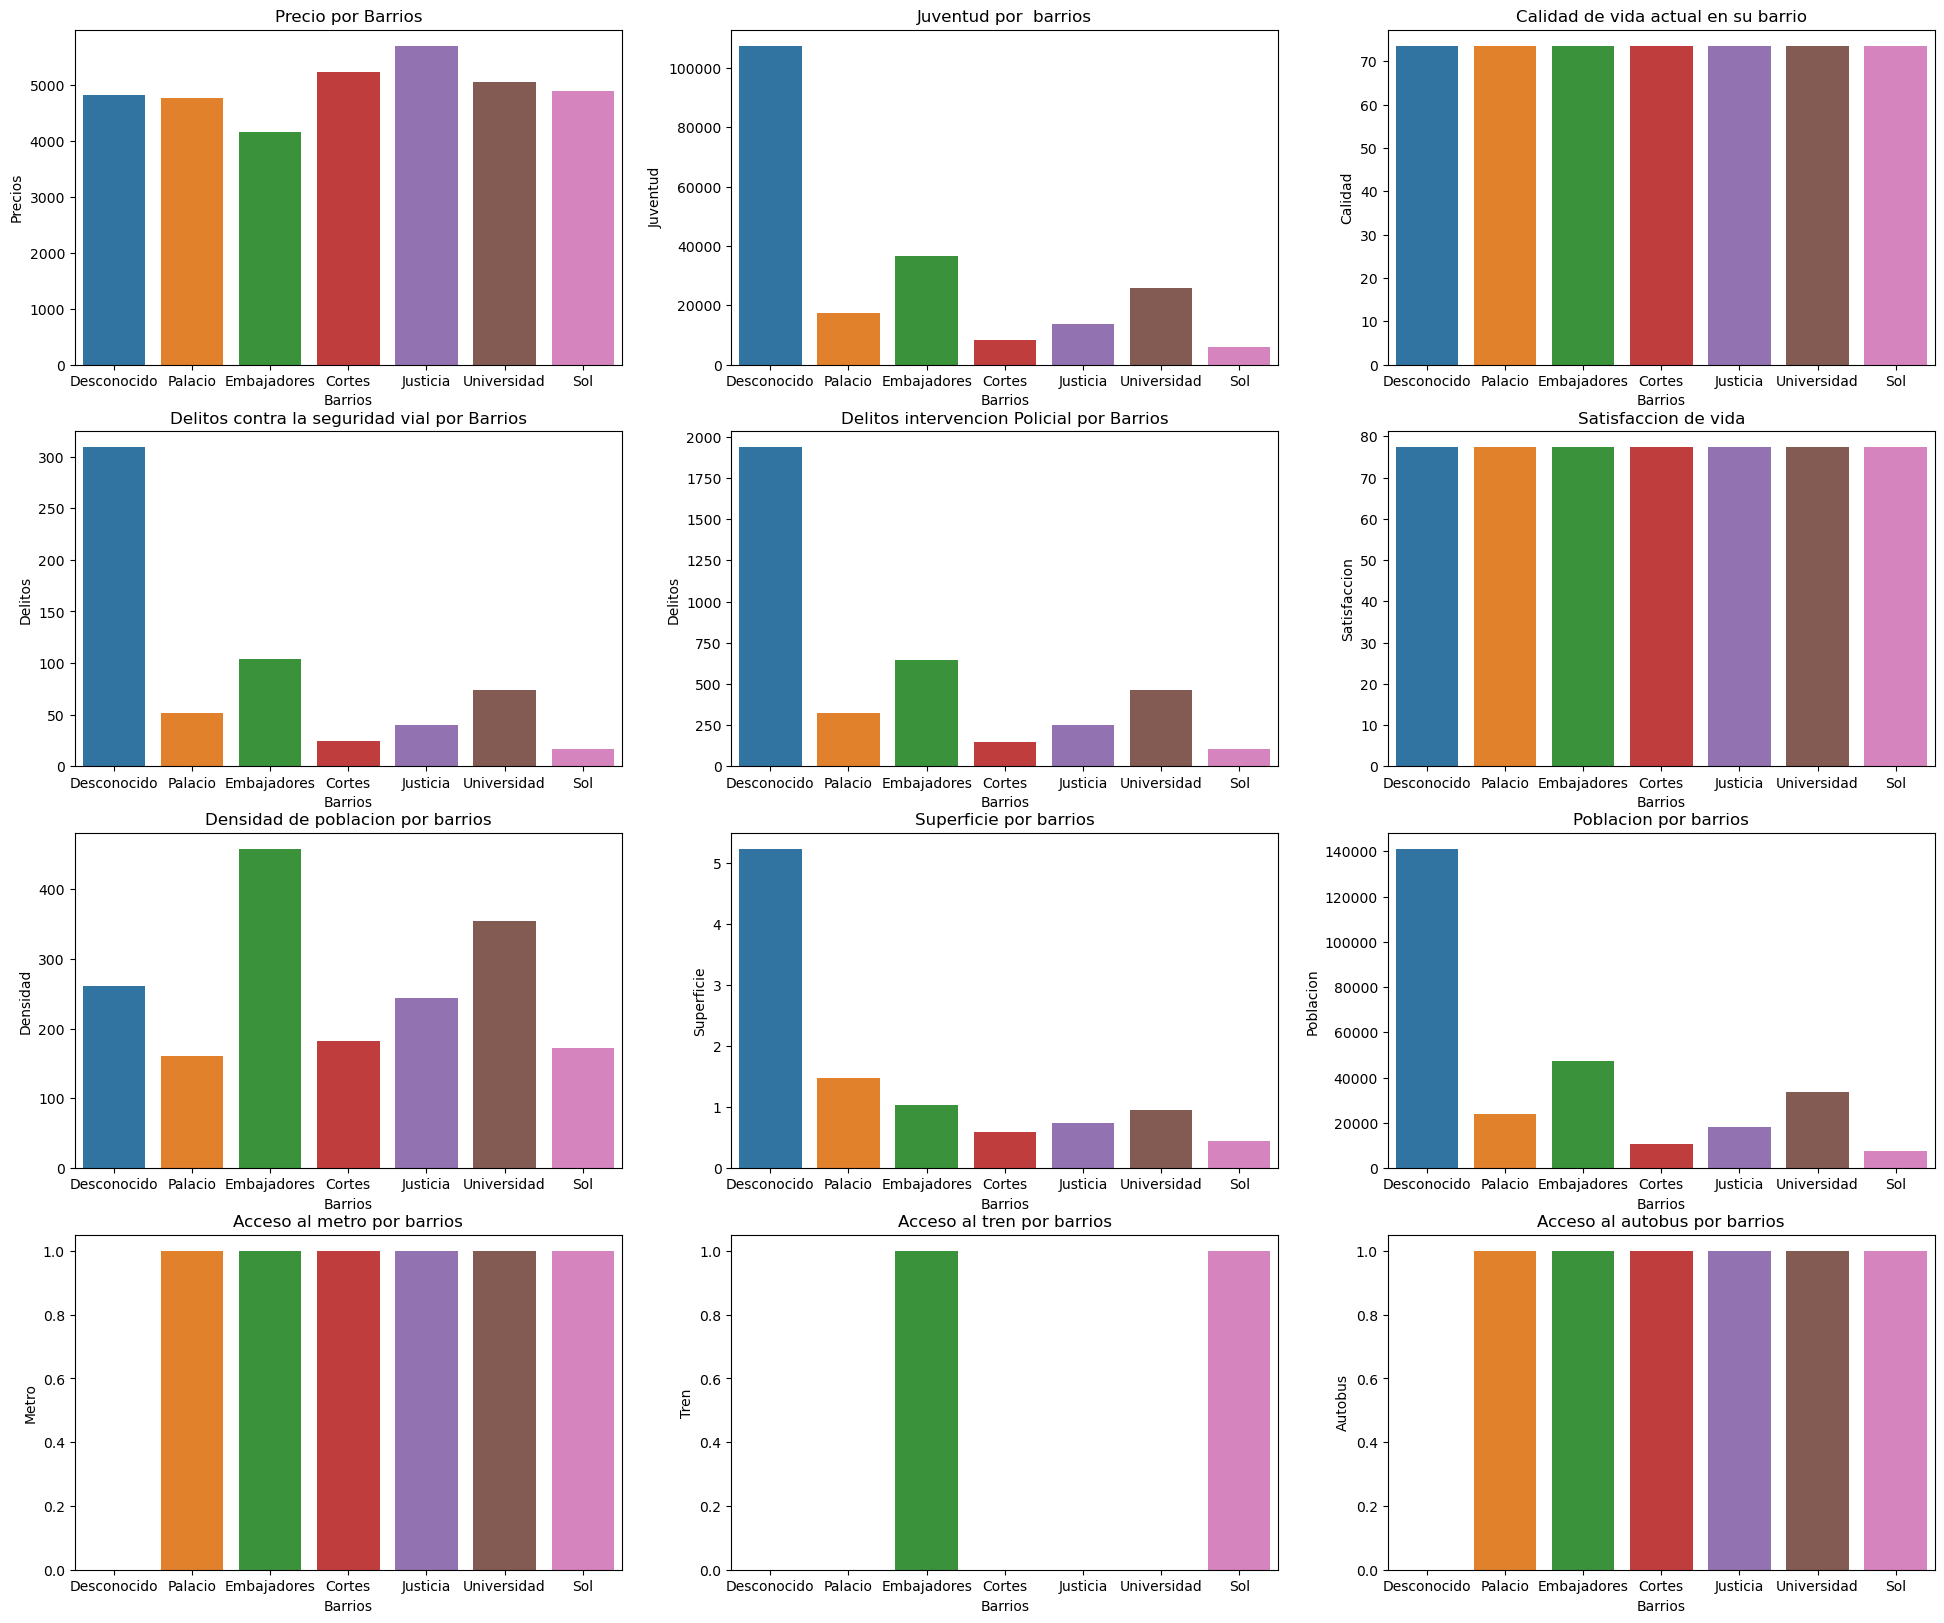

In [9]:
fig, axes = plt.subplots(4, 3, figsize=(24, 20))
sns.barplot(x = "Barrios", 
            y = "Precio feb 2021", 
            data = df_centro,
            ax=axes[0,0]) 
axes[0, 0].set_title("Precio por Barrios")
axes[0, 0].set_xlabel("Barrios")
axes[0, 0].set_ylabel("Precios")
sns.barplot(x = "Barrios", 
            y = "16-64 años", 
            data = df_centro,
            ax=axes[0,1]) 
axes[0, 1].set_title("Juventud por  barrios")
axes[0, 1].set_xlabel("Barrios")
axes[0, 1].set_ylabel("Juventud")
sns.barplot(x = "Barrios", 
            y = "Calidad de vida actual en su barrio \n", 
            data = df_centro,
            ax=axes[0,2]) 
axes[0, 2].set_title("Calidad de vida actual en su barrio")
axes[0, 2].set_xlabel("Barrios")
axes[0, 2].set_ylabel("Calidad")
sns.barplot(x = "Barrios", 
            y = "Delitos contra seguridad vial", 
            data = df_centro,
            ax=axes[1,0]) 
axes[1, 0].set_title("Delitos contra la seguridad vial por Barrios")
axes[1, 0].set_xlabel("Barrios")
axes[1, 0].set_ylabel("Delitos")
sns.barplot(x = "Barrios", 
            y = "Delitos intervencion policial", 
            data = df_centro,
            ax=axes[1,1]) 
axes[1,1].set_title("Delitos intervencion Policial por Barrios")
axes[1,1].set_xlabel("Barrios")
axes[1,1].set_ylabel("Delitos")
sns.barplot(x = "Barrios", 
            y = "Satisfacción de vivir en su barrio \n", 
            data = df_centro,
            ax=axes[1,2]) 
axes[1, 2].set_title("Satisfaccion de vida")
axes[1, 2].set_xlabel("Barrios")
axes[1, 2].set_ylabel("Satisfaccion")
sns.barplot(x = "Barrios", 
            y = "Densidad", 
            data = df_centro,
            ax=axes[2,0]) 
axes[2, 0].set_title("Densidad de poblacion por barrios")
axes[2, 0].set_xlabel("Barrios")
axes[2, 0].set_ylabel("Densidad")
sns.barplot(x = "Barrios", 
            y = "Superficie", 
            data = df_centro,
            ax=axes[2,1]) 
axes[2, 1].set_title("Superficie por barrios")
axes[2, 1].set_xlabel("Barrios")
axes[2, 1].set_ylabel("Superficie")
sns.barplot(x = "Barrios", 
            y = "Población", 
            data = df_centro,
            ax=axes[2,2]) 
axes[2, 2].set_title("Poblacion por barrios")
axes[2, 2].set_xlabel("Barrios")
axes[2, 2].set_ylabel("Poblacion") 
sns.barplot(x = "Barrios", 
            y = "Metro", 
            data = df_centro,
            ax=axes[3,0]) 
axes[3, 0].set_title("Acceso al metro por barrios")
axes[3, 0].set_xlabel("Barrios")
axes[3, 0].set_ylabel("Metro")  
sns.barplot(x = "Barrios", 
            y = "Tren", 
            data = df_centro,
            ax=axes[3,1]) 
axes[3, 1].set_title("Acceso al tren por barrios")
axes[3, 1].set_xlabel("Barrios")
axes[3, 1].set_ylabel("Tren") 
sns.barplot(x = "Barrios", 
            y = "Autobus", 
            data = df_centro,
            ax=axes[3,2]) 
axes[3, 2].set_title("Acceso al autobus por barrios")
axes[3, 2].set_xlabel("Barrios")
axes[3, 2].set_ylabel("Autobus") 
plt.show()







- LA CALIDAD DE VIDA POR BARRIO Y SATISFACCION 
Dado que la calidad de vida por barrio y la satisfaccion 
por barrio son las mismas se interpreta que ambas son sacadas de la media de todas y asignadas por igual 
para cada distrito.

In [11]:
df_centro[["Calidad de vida actual en su barrio \n","Satisfacción de vivir en su barrio \n"]]

,Calidad de vida actual en su barrio \n,Satisfacción de vivir en su barrio \n
0,73.6,77.3
1,73.6,77.3
2,73.6,77.3
3,73.6,77.3
4,73.6,77.3
5,73.6,77.3
6,73.6,77.3


- DELITOS Y SEGURIDAD 
Los dos tipos de delitos estan proporcionales por barrios el barrio que 
tiene mas delitos de intervencion policial tambien tiene mas delitos contra la seguridad vial 
La seguridad de dia o de noche es la misma para todos los barrios por lo que se entiende que 
es una media de todas asignada por distrito

In [12]:
df_centro[["Población","Delitos intervencion policial","Delitos contra seguridad vial","Seguridad Percibida día","Seguridad Percibida de Noche"]].sort_values("Población",ascending=False)

,Población,Delitos intervencion policial,Delitos contra seguridad vial,Seguridad Percibida día,Seguridad Percibida de Noche
0,140991,1936,309,82.7,69.8
2,47224,648,104,82.7,69.8
5,33540,460,74,82.7,69.8
1,23695,325,52,82.7,69.8
4,18092,248,40,82.7,69.8
3,10793,148,24,82.7,69.8
6,7647,105,17,82.7,69.8


- TIPO DE POBLACION
Estando el grueso de la poblacion en rango de edad 16 a 65 se observa que es proporcional a la delincuencia 
por lo que se entiende que la mayoria de infracciones las realizan personas que estan en este rango de edad

In [22]:
df_centro[["Barrios","0-15 años","16-64 años","65 o más años"]]

,Barrios,0-15 años,16-64 años,65 o más años
0,Desconocido,10919,107548,22006
1,Palacio,1825,17342,4426
2,Embajadores,3914,36697,6437
3,Cortes,772,8191,1808
4,Justicia,1419,13775,2827
5,Universidad,2503,25700,5215
6,Sol,486,5843,1293


- DENSIDAD POBLACION Y SUPERFICIE
Se observa que no son proporcionales entre ellas, un ejemplo, es el barrio Embajadores la densida de poblacion
entendiendose como una medida que propone una medidicion relativa que expresa la cantidad de personas por unidad de área
cuya grafica, expresa que en Embajadores es alta y no es proporcional con su superficie ya que no es la que mayor superficie
ostenta, asi mismo, Embajadores no es la que tiene mas cantidad de poblacion total.

In [30]:
df_centro[df_centro["Barrios"]=="Embajadores"][["Densidad","Superficie","Población"]]

,Densidad,Superficie,Población
2,457.596899,1.032,47224


In [32]:
df_centro[["Densidad","Superficie","Población"]].max()

Densidad         457.596899
Superficie         5.228000
Población     140991.000000
dtype: float64

-  TRANSPORTES
Los barrios representados menos un barrio cuyo nombre no sabemos tienen acceso al Metro y al Autobus
sin embargo al tren solo embajadores y sol

- CALIDAD DEL AIRE
Dado al esfuerzo por mantener el centro excento de polucion en la medida de lo posible
segun los datos la calidad del aire es muy buena

In [36]:
df_centro[["Barrios","Calidad del aire"]]

,Barrios,Calidad del aire
0,Desconocido,Muy bueno
1,Palacio,Muy bueno
2,Embajadores,Muy bueno
3,Cortes,Muy bueno
4,Justicia,Muy bueno
5,Universidad,Muy bueno
6,Sol,Muy bueno


- CONCLUSION FINAL

La ocupacion por barrios no se observa de manera correlativa en todos los datos por lo que no siempre
se cumple que donde el coste de vivir es menor la poblacion es mayor. Por lo que tiene una tendencia
no lineal

Sobre la delincuencia se deben considerar otros factores potenciales que podrían estar en juego, como factores socioeconómicos, políticos y culturales, por lo que seria mas compleja que la que observamos.

En los datos aparece una tendencia lineal en la delincuencia que dependera de la cantiad de poblacion
y del precio de tal manera que a mayor poblacion en un  barrio que tenga un menor precio mayor sera la
cantidad de delitos registrados.

Asi mismo tambien obtenemos que la cantidad de los dos tipos de delitos son proporcionales
siendo asi donde hay una mayor cantidad de delitos contra la seguridad vial hay una mayor cantidad
de delitos de intervencion policial.

La calidad del aire segun los datos, representa una tendencia plana, lo logico seria
que a mayor cantidad de poblacion y densidad en una menor superficie la calidad del aire sea mas baja
pero segun los datos esta relacion no se cumple.

Asi mismo la relacion de la calidad del aire es mas compleja que la aqui planteada y se necesitarian
mas datos para plantear y analizar la tendencia real.



